In [1]:
import os
import joblib

In [2]:
from sagemaker.huggingface import HuggingFace

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [3]:
import sagemaker
from sagemaker import get_execution_role

In [4]:
# you can check out the role : AmazonSageMaker-ExecutionRole-20250415T224328 in IAM role
# later on we can add permissions policies to it,
# like S3FullAccess to be able to work with our training data
role = get_execution_role()
role

'arn:aws:iam::658974490035:role/service-role/AmazonSageMaker-ExecutionRole-20250415T224328'

In [5]:
sm_sess = sagemaker.Session()
sm_sess

In [6]:
role = get_execution_role()  # or provide your role ARN
session = sagemaker.Session()

# Hugging Face Estimator
huggingface_estimator = HuggingFace(
    entry_point="train2.py",
    source_dir=".",
    role=role,
    instance_type="ml.p3.2xlarge", # ml.p3.2xlarge, ml.g4dn.xlarge
    instance_count=1,
    transformers_version="4.26",
    pytorch_version="1.13",
    py_version="py39",
    hyperparameters={
        "epochs": 5,
        "batch_size": 32,
        "lr": 2e-5,
        "train_file": "s3://news-headlines-4cls/training_data/uci-news-aggregator.csv",
        "frac": .5 # use fraction of training data (to speed up model deveopment mostly)
    },
    use_spot_instances=True,
    max_wait=1800,       # Total wall clock time (includes wait)
    max_run=1800,        # Time training is expected to take
    base_job_name="news-classifier-distilbert",
    # 👇 This line tells SageMaker where to store your outputs (model.tar.gz, logs, etc.)
    # instead of the default: 's3://sagemaker-us-east-1-<some-numbers>/'
    # this is saved in: huggingface_estimator.output_path
    output_path="s3://news-headlines-4cls/outputs/"
)


In [7]:
# Launch training
# Invoking script with the following command:
# /opt/conda/bin/python3.9 train.py --batch_size 16 --epochs 3 --lr 2e-05 --train_input s3://.../uci-news-aggregator.csv
huggingface_estimator.fit()

[04/19/25 10:25:19] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=93260;file:///opt/conda/lib/python3.11/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=70447;file:///opt/conda/lib/python3.11/site-packages/sagemaker/telemetry/telemetry_logging.py#91\91]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

[04/19/25 10:25:59] INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=789006;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=762135;file:///opt/conda/lib/python3.11/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    INFO     Creating training-job with name:                                       ]8;id=246558;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=770030;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py#1042\1042]8;;\
                             news-classifier-distilbert-2025-04-19-10-25-19-455                                    

2025-04-19 10:26:00 Starting - Starting the training job...
..25-04-19 10:26:23 Starting - Preparing the instances for training.
..25-04-19 10:26:59 Downloading - Downloading input data.
....................Downloading - Downloading the training image.
2025-04-19 10:30:37 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/opt/conda/lib/python3.9/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/opt/conda/lib/python3.9/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
2025-04-19 10:30:54,16

In [8]:
huggingface_estimator.base_job_name

'news-classifier-distilbert'

In [9]:
huggingface_estimator.hyperparameters()

{'epochs': '5',
 'batch_size': '32',
 'lr': '2e-05',
 'train_file': '"s3://news-headlines-4cls/training_data/uci-news-aggregator.csv"',
 'frac': '0.5',
 'sagemaker_submit_directory': '"s3://news-headlines-4cls/news-classifier-distilbert-2025-04-19-10-25-19-455/source/sourcedir.tar.gz"',
 'sagemaker_program': '"train2.py"',
 'sagemaker_container_log_level': '20',
 'sagemaker_job_name': '"news-classifier-distilbert-2025-04-19-10-25-19-455"',
 'sagemaker_region': '"us-east-1"'}

In [10]:
huggingface_estimator.instance_type

'ml.p3.2xlarge'

In [11]:
# huggingface_estimator.logs()

In [12]:
huggingface_estimator.output_path

's3://news-headlines-4cls/outputs/'

In [13]:
huggingface_estimator.model_uri

In [14]:
huggingface_estimator.model_data

's3://news-headlines-4cls/outputs/news-classifier-distilbert-2025-04-19-10-25-19-455/output/model.tar.gz'

In [15]:
huggingface_estimator.role

'arn:aws:iam::658974490035:role/service-role/AmazonSageMaker-ExecutionRole-20250415T224328'

In [16]:
huggingface_estimator.uploaded_code

UploadedCode(s3_prefix='s3://news-headlines-4cls/news-classifier-distilbert-2025-04-19-10-25-19-455/source/sourcedir.tar.gz', script_name='train2.py')

In [17]:
huggingface_estimator.use_spot_instances

True

In [18]:
# Fetch the saved objects back to the working directory:
!aws s3 cp {huggingface_estimator.model_data} .

download: s3://news-headlines-4cls/outputs/news-classifier-distilbert-2025-04-19-10-25-19-455/output/model.tar.gz to ./model.tar.gz


In [19]:
import os
import subprocess

# Safely extract and clean the job name
raw_job_name = huggingface_estimator.hyperparameters().get("sagemaker_job_name", "model_output")
job_dir = raw_job_name.strip("\"'")  # remove both " and ' if wrapped

# Create dir and extract
os.makedirs(job_dir, exist_ok=True)
subprocess.run(["tar", "-xzvf", "model.tar.gz", "-C", job_dir], check=True)


special_tokens_map.json
label_encoder.joblib
training_metrics.png
model.pt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'


training_metrics.csv
vocab.txt
tokenizer_config.json


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'


CompletedProcess(args=['tar', '-xzvf', 'model.tar.gz', '-C', 'news-classifier-distilbert-2025-04-19-10-25-19-455'], returncode=0)

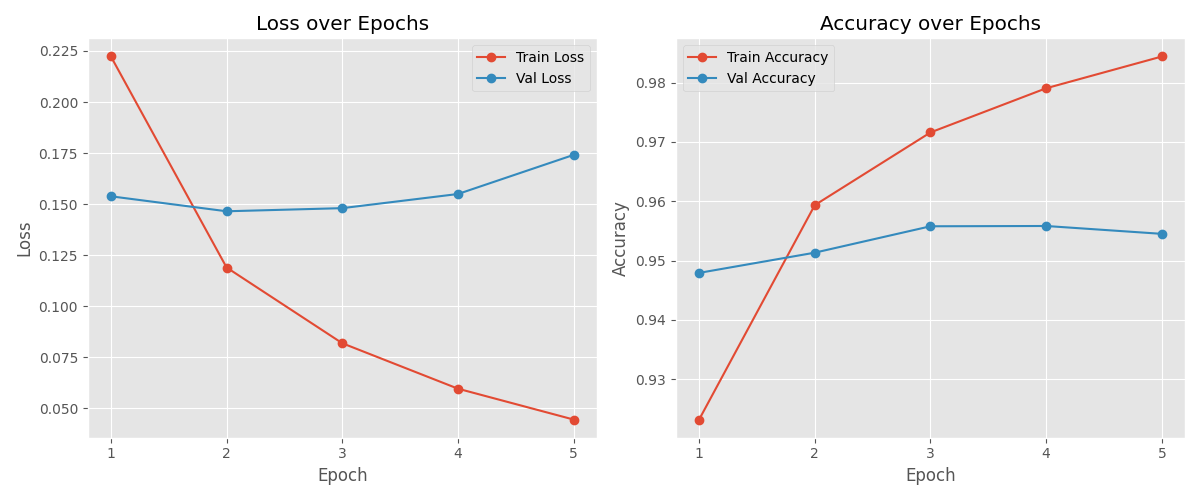

In [20]:
from IPython.display import Image, display

display(Image(filename=f"{job_dir}/training_metrics.png"))
